### HR - Attrition Analytics -  Exploratory Analysis & Predictive Modeling
> Human Resources are critical resources of any organiazation. Organizations spend huge amount of time and money to hire <br>
> and nuture their employees. It is a huge loss for companies if employees leave, especially the key resources.  <br>
> So if HR can predict weather employees are at risk for leaving the company, it will allow them to identify the attrition  <br>
> risks and help understand and provie necessary support to retain those employees or do preventive hiring to minimize the  <br>
> impact to the orgranization.

### DATA ATRRIBUTES

satisfaction_level: Employee satisfaction level <br>
last_evaluation: Last evaluation  <br>
number_project: Number of projects  <br>
average_montly_hours: Average monthly hours <br>
time_spend_company: Time spent at the company <br>
Work_accident: Whether they have had a work accident <br>
promotion_last_5years: Whether they have had a promotion in the last 5 years <br>
department: Department <br>
salary: Salary <br>
left: Whether the employee has left <br>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the data
hr_df = pd.read_csv( 'C:/Users/tejan/Desktop/Data Analystics/class work/HR_comma_sep.csv' )

In [3]:
hr_df.promotion_last_5years.value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [4]:
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [5]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
#missings
hr_df.isnull().any().sum()

0

In [7]:
hr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [8]:
hr_df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


The summary statistics for Work_accident, left and promotion_last_5years does not make sense, as they are categorical variables

### PREDICTIVE MODEL: Build a model to predict if an employee will leave the company

In [9]:
# Encoding Categorical Features
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project',
     'average_montly_hours', 'time_spend_company', 'promotion_last_5years']

categorical_features = ['Work_accident', 'department', 'salary']

In [10]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [11]:
for c_feature in categorical_features:
    hr_df = create_dummies( hr_df, c_feature )

In [12]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,Work_accident_1,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0


In [13]:
#Splitting the data

feature_columns = hr_df.columns.difference( ['left'] )
#feature_columns1 = feature_columns

In [14]:
feature_columns

Index(['Work_accident_1', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years', 'salary_low',
       'salary_medium', 'satisfaction_level', 'time_spend_company'],
      dtype='object')

In [15]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split( hr_df[feature_columns],
                                                      hr_df['left'],
                                                      test_size = 0.3,
                                                      random_state = 123 )

In [16]:
# Building Models
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_X, train_y)

C:\Users\tejan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
logreg.predict(train_X)   #by default, it use cut-off as 0.5

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [111]:
list( zip( feature_columns, logreg.coef_[0] ) )

[('Work_accident_1', -1.5532601490633877),
 ('average_montly_hours', 0.0039677438045501),
 ('department_RandD', -0.4683417239762259),
 ('department_accounting', 0.17214253100539073),
 ('department_hr', 0.41211466363065014),
 ('department_management', -0.6537715457884192),
 ('department_marketing', 0.13848597862650097),
 ('department_product_mng', -0.03754471415508254),
 ('department_sales', 0.041717127622038074),
 ('department_support', 0.05390189622473758),
 ('department_technical', 0.1339896321386625),
 ('last_evaluation', 0.5755153259786715),
 ('number_project', -0.31910714756127867),
 ('promotion_last_5years', -0.7568541524310151),
 ('salary_low', 1.54101348608523),
 ('salary_medium', 0.9968131532455144),
 ('satisfaction_level', -4.285825436774781),
 ('time_spend_company', 0.2473783672990456)]

In [112]:
logreg.intercept_

array([-0.77643589])

In [113]:
#Predicting the test cases
hr_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': logreg.predict( test_X ) } )

In [114]:

hr_test_pred = hr_test_pred.reset_index()

In [115]:
#Comparing the predictions with actual test data
hr_test_pred.sample( n = 10 )

,index,actual,predicted
862,13628,0,0
1512,1720,1,0
1361,9756,0,0
4118,6498,0,0
1236,7377,0,0
4169,1183,1,1
2474,11500,0,0
1475,11654,0,0
683,1918,1,1
25,12721,1,1


In [116]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix( hr_test_pred.actual,
                            hr_test_pred.predicted, [1,0] )
cm

C:\Users\tejan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([[ 407,  664],
       [ 246, 3183]], dtype=int64)

In [117]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0.5, 15.0, 'Predicted label')

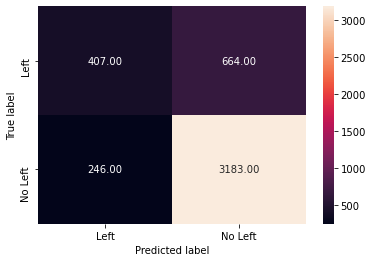

In [118]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [119]:
score = metrics.accuracy_score( hr_test_pred.actual, hr_test_pred.predicted )
round( float(score), 2 )

0.8

Overall test accuracy is 78%. But it is not a good measure. The result is very high as there are lots of cases which are no left and the model has predicted most of them as no left. <br>
The objective of the model is to indentify the people who will leave, so that the company can intervene and act.<br>
This might be the case as the default model assumes people with more than 0.5 probability will not leave the company

The model is predicting the probability of him leaving the company is only 0.027, which is very low.

In [120]:
#How good the model is?
predict_proba_df = pd.DataFrame( logreg.predict_proba( test_X ) )
predict_proba_df.head()

,0,1
0,0.925187,0.074813
1,0.948910,0.051090
2,0.944139,0.055861
3,0.850573,0.149427
4,0.915638,0.084362


In [121]:
hr_test_pred = pd.concat( [hr_test_pred, predict_proba_df], axis = 1 )

In [122]:
hr_test_pred.columns = ['index', 'actual', 'predicted', 'Left_0', 'Left_1']

In [123]:
auc_score = metrics.roc_auc_score( hr_test_pred.actual, hr_test_pred.Left_1  )
round( float( auc_score ), 2 )

0.82

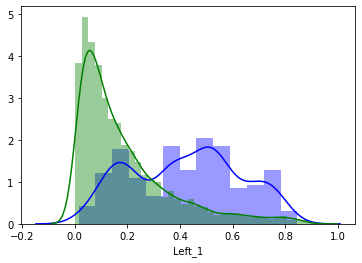

In [124]:
sn.distplot( hr_test_pred[hr_test_pred.actual == 1]["Left_1"], color = 'b' )
sn.distplot( hr_test_pred[hr_test_pred.actual == 0]["Left_1"], color = 'g' )

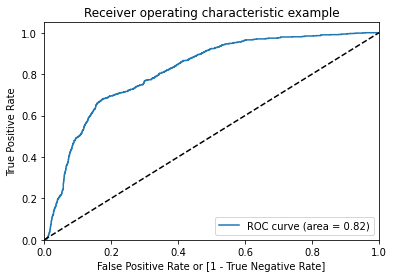

In [125]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve( hr_test_pred.actual,
                                     hr_test_pred.Left_1,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [126]:
print(thresholds[0:10])
print(fpr[0:10])
print(tpr[0:10])

[1.90757363 0.90757363 0.88050723 0.87874224 0.86874588 0.86095359
 0.85843828 0.85756551 0.85292255 0.85023813]
[0.         0.00029163 0.00058326 0.00087489 0.00116652 0.00145815
 0.00204141 0.00233304 0.00262467 0.0029163 ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [127]:
tpr[np.abs(tpr - 0.7).argmin()]

0.7002801120448179

In [128]:
cutoff_prob = thresholds[(np.abs(tpr - 0.7)).argmin()]

In [129]:
round( float( cutoff_prob ), 2 )

0.29

In [130]:
#Predicting with new cut-off probability
hr_test_pred['new_labels'] = hr_test_pred['Left_1'].map( lambda x: 1 if x >= 0.3 else 0 )

In [131]:
metrics.accuracy_score( hr_test_pred.actual, hr_test_pred['new_labels'])

0.7775555555555556

In [132]:
hr_test_pred[0:10]

,index,actual,predicted,Left_0,Left_1,new_labels
0,6958,0,0,0.925187,0.074813,0
1,7534,0,0,0.948910,0.051090,0
2,2975,0,0,0.944139,0.055861,0
3,3903,0,0,0.850573,0.149427,0
4,8437,0,0,0.915638,0.084362,0
5,6812,0,0,0.881027,0.118973,0
6,1567,1,1,0.477977,0.522023,1
7,14679,1,0,0.870797,0.129203,0
8,10188,0,0,0.903546,0.096454,0
9,11718,0,0,0.986758,0.013242,0


C:\Users\tejan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Text(0.5, 15.0, 'Predicted label')

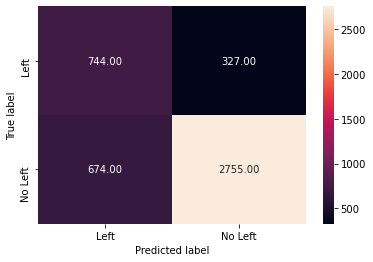

In [133]:

cm = metrics.confusion_matrix( hr_test_pred.actual,
                          hr_test_pred.new_labels, [1,0] )
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Building Decision Tree Model

In [134]:
import sklearn.tree as dt

In [135]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.model_selection import GridSearchCV

#### Fine Tuning the parameters

In [186]:
param_grid = {'max_depth': np.arange(2, 12),
             'max_features': np.arange(9,18)}

In [187]:
train_X.shape

(10499, 18)

In [302]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10,verbose=0)
tree.fit( train_X, train_y )

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'max_features': array([ 9, 10, 11, 12, 13, 14, 15, 16, 17])})

In [189]:
tree.best_score_

0.9799029461164828

In [190]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=8, max_features=17)

In [191]:
tree.best_params_

{'max_depth': 8, 'max_features': 17}

In [142]:
train_pred = tree.predict(train_X)

In [143]:
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7999
           1       0.99      0.95      0.97      2500

    accuracy                           0.99     10499
   macro avg       0.99      0.98      0.98     10499
weighted avg       0.99      0.99      0.99     10499



In [144]:
test_pred = tree.predict(test_X)

In [56]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3429
           1       0.97      0.94      0.95      1071

    accuracy                           0.98      4500
   macro avg       0.97      0.96      0.97      4500
weighted avg       0.98      0.98      0.98      4500



### Building Final Decision Tree Model

In [192]:
clf_tree = DecisionTreeClassifier( max_depth = 8, max_features=17)
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(max_depth=8, max_features=17)

## Feature Importance

In [193]:
train_X.columns

Index(['Work_accident_1', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years', 'salary_low',
       'salary_medium', 'satisfaction_level', 'time_spend_company'],
      dtype='object')

In [194]:
clf_tree.feature_importances_

array([0.00000000e+00, 6.79169922e-02, 8.36355500e-04, 6.65478844e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.21412344e-05, 1.21520636e-03, 2.85820220e-04, 1.42906325e-01,
       1.08926301e-01, 0.00000000e+00, 1.67500834e-03, 1.60223282e-03,
       5.15692984e-01, 1.58215154e-01])

In [195]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
dataframe = pd.DataFrame({'feature':feature_columns, 'importance':clf_tree.feature_importances_})

In [247]:
dataframe.sort_values(by = 'importance', axis = 0, ascending = False)

,feature,importance
16,satisfaction_level,0.515693
17,time_spend_company,0.158215
11,last_evaluation,0.142906
12,number_project,0.108926
1,average_montly_hours,0.067917
14,salary_low,0.001675
15,salary_medium,0.001602
9,department_support,0.001215
2,department_RandD,0.000836
3,department_accounting,0.000665


In [199]:
list(zip(train_X.columns,clf_tree.feature_importances_ ))

[('Work_accident_1', 0.0),
 ('average_montly_hours', 0.0679169921547331),
 ('department_RandD', 0.0008363554996486226),
 ('department_accounting', 0.0006654788444509859),
 ('department_hr', 0.0),
 ('department_management', 0.0),
 ('department_marketing', 0.0),
 ('department_product_mng', 0.0),
 ('department_sales', 6.21412344088913e-05),
 ('department_support', 0.001215206361773871),
 ('department_technical', 0.00028582022035712447),
 ('last_evaluation', 0.14290632498045433),
 ('number_project', 0.10892630105579945),
 ('promotion_last_5years', 0.0),
 ('salary_low', 0.00167500834276466),
 ('salary_medium', 0.0016022328197292468),
 ('satisfaction_level', 0.515692984425136),
 ('time_spend_company', 0.15821515406074382)]

In [200]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )

In [201]:
tree_test_pred.sample( n = 10 )

,actual,predicted
5735,0,0
9080,0,0
14670,1,1
1750,1,1
14861,1,1
12959,0,0
10110,0,0
5240,0,0
2725,0,0
1908,1,1


In [202]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.9762222222222222

C:\Users\tejan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Text(0.5, 15.0, 'Predicted label')

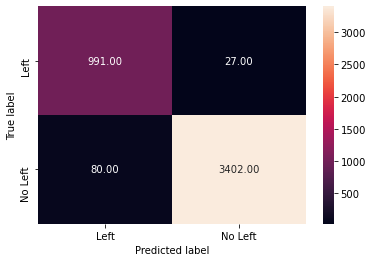

In [203]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [204]:
metrics.roc_auc_score( tree_test_pred.actual, tree_test_pred.predicted )

0.958714719483594

In [182]:
import os     
os.environ["PATH"] += os.pathsep + 'C:\\Users\\tejan'

In [184]:
# Exporting the tree output in the form opendocument
export_graphviz( clf_tree,
              out_file = "hr_tree.odt",
              feature_names = train_X.columns )

In [185]:
# Converting open document file to jpg imanage

import pydotplus as pdot

chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'hr_tree.odt' )

In [1]:
chd_tree_graph.write_jpg( 'hr_tree.jpg' )

In [179]:
# Viewing the image in the notebook (display the image)
from IPython.display import Image
Image(filename='hr_tree.jpg')

In [17]:
import sklearn.ensemble as en


In [18]:
dir(en)

['AdaBoostClassifier',
 'AdaBoostRegressor',
 'BaggingClassifier',
 'BaggingRegressor',
 'BaseEnsemble',
 'ExtraTreesClassifier',
 'ExtraTreesRegressor',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'IsolationForest',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomTreesEmbedding',
 'StackingClassifier',
 'StackingRegressor',
 'VotingClassifier',
 'VotingRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bagging',
 '_base',
 '_forest',
 '_gb',
 '_gb_losses',
 '_gradient_boosting',
 '_iforest',
 '_stacking',
 '_voting',
 '_weight_boosting',
 'typing']

### Bagged decision trees (with B=10)

In [205]:
from sklearn.ensemble import BaggingClassifier

In [208]:
bagclm = BaggingClassifier(oob_score=True, n_estimators=100, verbose=False, n_jobs=-1)
bagclm.fit(train_X, train_y)

BaggingClassifier(n_estimators=100, n_jobs=-1, oob_score=True, verbose=False)

In [209]:
bagclm.predict(train_X)

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [210]:
bagclm.oob_score_

0.9879036098676064

In [227]:
y_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': bagclm.predict( test_X) } )
y_pred.predicted.value_counts()

0    3444
1    1056
Name: predicted, dtype: int64

In [216]:
print(metrics.accuracy_score( y_pred.actual, y_pred.predicted ))
print(metrics.roc_auc_score( y_pred.actual, y_pred.predicted ))

0.9886666666666667
0.9819691656190036


C:\Users\tejan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Text(0.5, 15.0, 'Predicted label')

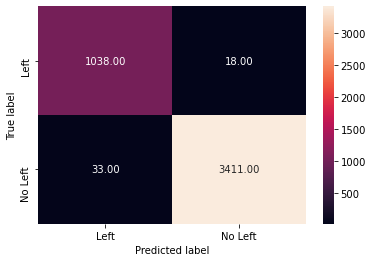

In [217]:
tree_bg = metrics.confusion_matrix( y_pred.predicted,
                                 y_pred.actual,
                                 [1,0] )
sn.heatmap(tree_bg, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [218]:
pargrid_bagging = {'n_estimators': [200,250,300,350,400]}

gscv_bagging = GridSearchCV(estimator=BaggingClassifier(), 
                        param_grid=pargrid_bagging, 
                        cv=5,
                        verbose=1, n_jobs=-1)

In [219]:
gscv_results = gscv_bagging.fit(train_X, train_y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.3min finished


In [220]:
gscv_results.best_params_

{'n_estimators': 250}

In [221]:
gscv_results.best_score_

0.9876180494112843

In [226]:
y_pred1 = pd.DataFrame( { 'actual':  test_y,
                            'predicted': gscv_results.predict( test_X) } )
y_pred1.predicted.value_counts()

0    3443
1    1057
Name: predicted, dtype: int64

In [ ]:

print(metrics.accuracy_score( y_pred.actual, gscv_results.predict( test_X)))
print(metrics.roc_auc_score( y_pred.actual, gscv_results.predict( test_X)))

In [230]:
# bagclm.feature_importances_

In [232]:
tree_bg = metrics.confusion_matrix( y_pred1.predicted,
                                 y_pred1.actual,
                                 [1,0] )

tree_bg

array([[1039,   18],
       [  32, 3411]], dtype=int64)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [236]:
pargrid_rf = {'n_estimators': [ 70, 80, 90, 100,150,200],
                  'max_features': [5,6,7,8,9,10,11]}

from sklearn.model_selection import GridSearchCV
gscv_rf = GridSearchCV(estimator=RandomForestClassifier(oob_score=True), 
                        param_grid=pargrid_rf, 
                        cv=5,
                        verbose=True, n_jobs=-1)

gscv_results = gscv_rf.fit(train_X, train_y)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:  2.0min finished


In [295]:
gscv_results.best_params_

{'max_features': 7, 'n_estimators': 80}

In [239]:
gscv_rf.best_score_

0.9891418589350938

In [240]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=80, max_features=7, n_jobs=-1)
radm_clf.fit( train_X, train_y )

RandomForestClassifier(max_features=7, n_estimators=80, n_jobs=-1,
                       oob_score=True)

In [296]:
from sklearn import tree

In [298]:
# fig, axis = plt.subplot(nrows = 1 , ncols = 1, figsize = (6,4), dpi = 600)

In [2]:
tree.plot_tree(clf_tree, feature_names= feature_columns, class_names= ['0', '1'], filled= True)

In [299]:
feature_columns

Index(['Work_accident_1', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years', 'salary_low',
       'salary_medium', 'satisfaction_level', 'time_spend_company'],
      dtype='object')

In [243]:
radm_clf.n_features_

18

In [254]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf.predict( test_X ) } )

In [255]:
print(metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted ))
print(metrics.roc_auc_score( radm_test_pred.actual, radm_test_pred.predicted ))

0.9911111111111112
0.9838941700914837


In [ ]:
tree_cm = metrics.confusion_matrix( radm_test_pred.predicted,
                                 radm_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

### Feature importance from the Random Forest Model

In [244]:
print(radm_clf.feature_importances_)
print(np.argsort(radm_clf.feature_importances_))

[0.00516112 0.13635747 0.0010354  0.00127037 0.00108125 0.00144734
 0.00122413 0.00078777 0.00255556 0.00250467 0.0029313  0.12307458
 0.17628782 0.00096343 0.00464823 0.00308362 0.34470492 0.19088102]
[ 7 13  2  4  6  3  5  9  8 10 15 14  0 11  1 12 17 16]


In [245]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]

In [250]:
xxx = pd.DataFrame({'feature':feature_columns, 'importance':radm_clf.feature_importances_})

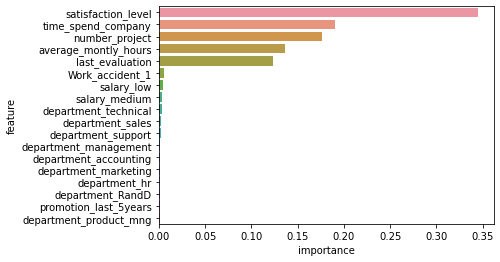

In [246]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sn.barplot( y = 'feature', x = 'importance', data = feature_rank )

<b> Note: </b>
As per the model, the most important features which influence whether to leave the company,in descending order, are

- satisfaction_level
- number_project
- time_spend_company
- last_evaluation
- average_montly_hours
- work_accident

### Boosting

#### Ada Boosting

In [256]:
from sklearn.ensemble import AdaBoostClassifier

In [271]:
pargrid_ada = {'n_estimators': [100, 200,250,300,350,400],
               'learning_rate': [10 ** x for x in range(-2, 2)]}

In [272]:
[10 ** x for x in range(-2, 2)]

[0.01, 0.1, 1, 10]

In [273]:
from sklearn.model_selection import GridSearchCV
gscv_ada = GridSearchCV(estimator=AdaBoostClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [274]:
gscv_ada.fit(train_X, train_y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.0min finished


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [100, 200, 250, 300, 350, 400]},
             verbose=True)

In [275]:
gscv_ada.best_params_

{'learning_rate': 1, 'n_estimators': 350}

In [276]:
gscv_ada.best_score_

0.9619015857891512

In [ ]:
df.is_null()

In [277]:
clf_ada = gscv_ada.best_estimator_

In [278]:
ad=clf_ada.fit(train_X, train_y )

In [279]:
print(metrics.accuracy_score(test_y,ad.predict(test_X)))
print(metrics.roc_auc_score(test_y,ad.predict(test_X)))

0.9595555555555556
0.9426419736748592


In [281]:
from sklearn.model_selection import cross_val_score

In [282]:
print(pd.Series(cross_val_score(clf_ada, test_X, test_y, cv=10)))

print(pd.Series(cross_val_score(clf_ada, test_X, test_y, cv=10)).describe()[['min', 'mean', 'max', 'std']])

0    0.948889
1    0.951111
2    0.953333
3    0.973333
4    0.962222
5    0.964444
6    0.944444
7    0.973333
8    0.940000
9    0.966667
dtype: float64
min     0.940000
mean    0.957778
max     0.973333
std     0.011852
dtype: float64


#### Gradient Boosting

In [283]:
from sklearn.ensemble import GradientBoostingClassifier

In [290]:
pargrid_gbm = {'n_estimators': [350,400,450,500],
               'learning_rate': [10 ** x for x in range(-2, 1)],
                'max_features': [5,6,7,8,9,10]}

In [291]:
[10 ** x for x in range(-3, 1)]

[0.001, 0.01, 0.1, 1]

In [292]:
from sklearn.model_selection import GridSearchCV
gscv_gbm = GridSearchCV(estimator=GradientBoostingClassifier(), 
                        param_grid=pargrid_gbm, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [293]:
gscv_gbm.fit(train_X, train_y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  4.2min finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_features': [5, 6, 7, 8, 9, 10],
                         'n_estimators': [350, 400, 450, 500]},
             verbose=True)

In [294]:
gscv_gbm.best_params_

{'learning_rate': 0.1, 'max_features': 10, 'n_estimators': 500}

In [ ]:
gbm = gscv_gbm.best_estimator_

In [ ]:
gscv_gbm.best_score_

In [ ]:
gbm.fit(train_X, train_y )

In [ ]:
print(metrics.accuracy_score(test_y,gbm.predict(test_X)))
print(metrics.roc_auc_score(test_y,gbm.predict(test_X)))

In [ ]:
print(pd.Series(cross_val_score(gbm, train_X, train_y, cv=10)))

print(pd.Series(cross_val_score(gbm, test_X, test_y, cv=10)).describe()[['min', 'mean', 'max']])

#### Xtreme Gradient Boosting

In [ ]:
from xgboost import XGBClassifier

In [ ]:
pargrid_xgbm = {'n_estimators': [200, 250, 300, 400, 500],
               'learning_rate': [10 ** x for x in range(-3, 1)],
                'max_features': [5,6,7,8,9,10]}

In [ ]:
from sklearn.grid_search import GridSearchCV
gscv_xgbm = GridSearchCV(estimator=XGBClassifier(), 
                        param_grid=pargrid_xgbm, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [ ]:
gscv_xgbm.fit(train_X, train_y)

In [ ]:
gscv_xgbm.best_params_

In [ ]:
xgbm = gscv_xgbm.best_estimator_

In [ ]:
gscv_gbm.best_score_

In [ ]:
xgbm.fit(train_X, train_y)

In [ ]:
print(metrics.accuracy_score(test_y,xgbm.predict(test_X)))
print(metrics.roc_auc_score(test_y,xgbm.predict(test_X)))

In [ ]:
print(pd.Series(cross_val_score(xgbm, test_X, test_y, cv=10)))

print(pd.Series(cross_val_score(xgbm, test_X, test_y, cv=10)).describe()[['min', 'mean', 'max']])